# Tratamento das base de dados das localizações dos radares eletrônicos

### Localização das bases

#### ANTT: https://dados.antt.gov.br/dataset/radar/resource/0e56291a-1092-45d5-b89a-d66b2a89dff4

#### DNIT: https://servicos.dnit.gov.br/multas/informacoes/equipamentos-fiscalizacao

# DER-SP: https://www.der.sp.gov.br/WebSite/Servicos/ConjuntoDados.aspx?tema=Ativos_Rodoviarios&conjunto=Radar

In [111]:
%pip install nbformat
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: folium in c:\users\pertile\appdata\local\programs\python\python311\lib\site-packages (0.20.0)




[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import folium

In [5]:
df_antt = pd.read_excel("../dados/loc_radar/radares_antt_com_data.xlsx")
df_antt.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado,ativacao_mes,ativacao_ano
0,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,664.773,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8582,-48.9512,60,60,10.0,2013.0
1,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,667.013,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8637,-48.9348,60,60,10.0,2013.0
2,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,668.334,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8693,-48.9341,60,60,7.0,2011.0
3,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,668.880,Guaratuba,Principal,Decrescente,Ativo,NaN,-25.8749,-48.9363,60,60,10.0,2013.0
4,AUTOPISTA LITORAL SUL,2009,Redutor,BR-101,SC,48.770,Joinville,Principal,Crescente,Ativo,NaN,-26.3802,-48.8516,80,80,3.0,2014.0


In [12]:
df_dnit = pd.read_excel("../dados/loc_radar/radares_dnit_com data.xlsx")
df_dnit.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,127.960,"-49.487068, -27.803703",14794301,6042,6,2020
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,128.275,"-49.49019, -27.803961",14794302,6043,6,2020
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282,215.255,"-50.282411, -27.79415",14794315,6046,6,2020
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282,218.510,"-50.3145, -27.796972",14794310,6052,6,2020
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282,218.550,"-50.3147, -27.797219",14794313,6053,6,2020


In [18]:
df_antt["ativacao_mes"] = df_antt["ativacao_mes"].astype("Int64")
df_antt["ativacao_ano"] = df_antt["ativacao_ano"].astype("Int64")
df_antt.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado,ativacao_mes,ativacao_ano
0,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,664.773,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8582,-48.9512,60,60,10,2013
1,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,667.013,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8637,-48.9348,60,60,10,2013
2,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,668.334,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8693,-48.9341,60,60,7,2011
3,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,668.880,Guaratuba,Principal,Decrescente,Ativo,NaN,-25.8749,-48.9363,60,60,10,2013
4,AUTOPISTA LITORAL SUL,2009,Redutor,BR-101,SC,48.770,Joinville,Principal,Crescente,Ativo,NaN,-26.3802,-48.8516,80,80,3,2014


In [19]:
df_dnit["ativacao_mes"] = df_dnit["ativacao_mes"].astype("Int64")
df_dnit["ativacao_ano"] = df_dnit["ativacao_ano"].astype("Int64")
df_dnit.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,127.960,"-49.487068, -27.803703",14794301,6042,6,2020
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,128.275,"-49.49019, -27.803961",14794302,6043,6,2020
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282,215.255,"-50.282411, -27.79415",14794315,6046,6,2020
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282,218.510,"-50.3145, -27.796972",14794310,6052,6,2020
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282,218.550,"-50.3147, -27.797219",14794313,6053,6,2020


In [17]:
df_antt["ativacao_ano"].value_counts()

ativacao_ano
2022    57
2021    28
2025    22
2015    21
2017    11
2014    10
2024     8
2013     7
2023     7
2019     7
2011     3
2018     3
2020     2
2012     2
2016     1
Name: count, dtype: Int64

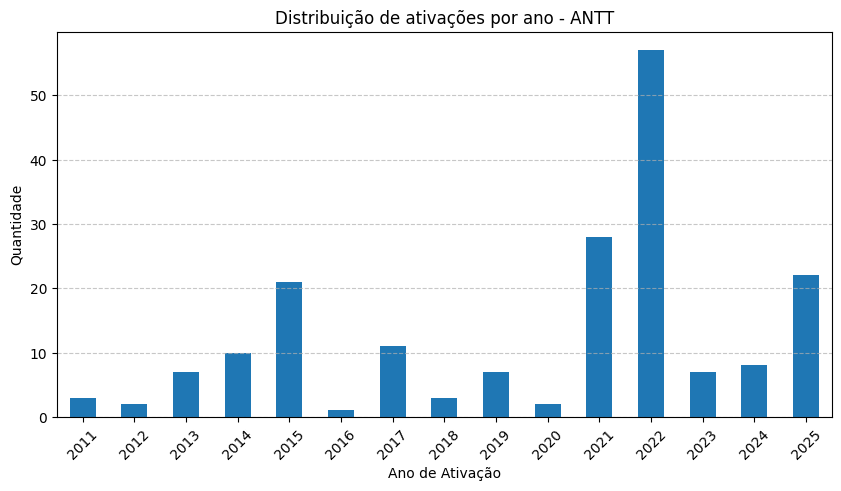

In [21]:
import matplotlib.pyplot as plt

# Contagem de valores
contagem = df_antt["ativacao_ano"].value_counts().sort_index()  # ordena pelos anos

# Gráfico de barras
plt.figure(figsize=(10,5))
contagem.plot(kind="bar")

plt.xlabel("Ano de Ativação")
plt.ylabel("Quantidade")
plt.title("Distribuição de ativações por ano - ANTT")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

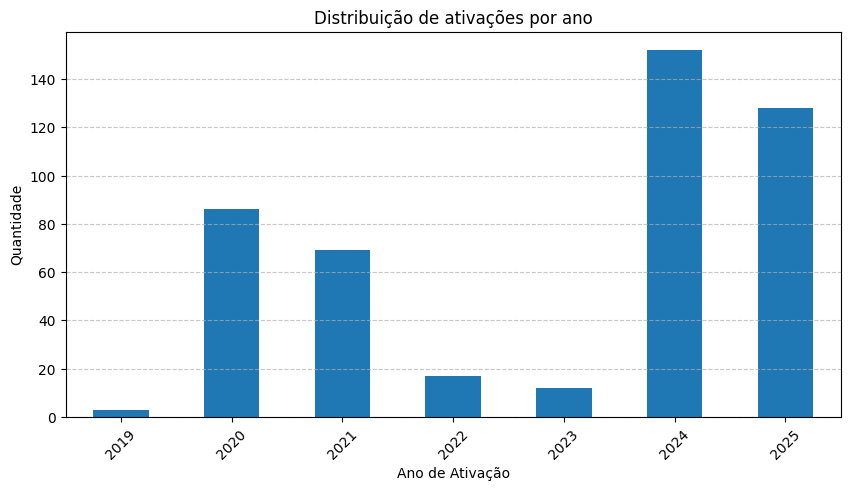

In [ ]:
import matplotlib.pyplot as plt

# Contagem de valores
contagem = df_dnit["ativacao_ano"].value_counts().sort_index()  # ordena pelos anos

# Gráfico de barras
plt.figure(figsize=(10,5))
contagem.plot(kind="bar")

plt.xlabel("Ano de Ativação")
plt.ylabel("Quantidade")
plt.title("Distribuição de ativações por ano - DNIT")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()